# lab-handling-data-imbalance-classification

In [99]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns 

1.Get the HEALTHCARE4ALL data set


In [100]:
num = pd.read_csv("numerical.csv")
target = pd.read_csv("target.csv")

In [101]:
num

,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,...,CARDGIFT,MINRAMNT,MAXRAMNT,LASTGIFT,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2
0,0,60.000000,5,9,0,0,39,34,18,10,...,14,5.0,12.0,10.0,4,7.741935,95515,0,4,39
1,1,46.000000,6,9,16,0,15,55,11,6,...,1,10.0,25.0,25.0,18,15.666667,148535,0,2,1
2,1,61.611649,3,1,2,0,20,29,33,6,...,14,2.0,16.0,5.0,12,7.481481,15078,1,4,60
3,0,70.000000,1,4,2,0,23,14,31,3,...,7,2.0,11.0,10.0,9,6.812500,172556,1,4,41
4,0,78.000000,3,2,60,1,28,9,53,26,...,8,3.0,15.0,15.0,14,6.864865,7112,1,2,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,1,61.611649,5,9,0,14,36,47,11,7,...,0,25.0,25.0,25.0,9,25.000000,184568,0,1,12
95408,1,48.000000,7,9,1,0,31,43,19,4,...,0,20.0,20.0,20.0,9,20.000000,122706,1,1,2
95409,1,60.000000,5,9,0,0,18,46,20,7,...,4,3.0,10.0,10.0,3,8.285714,189641,1,3,34
95410,0,58.000000,7,9,0,0,28,35,20,9,...,18,5.0,21.0,18.0,4,12.146341,4693,1,4,11


In [102]:
target

,TARGET_B,TARGET_D
0,0,0.0
1,0,0.0
2,0,0.0
3,0,0.0
4,0,0.0
...,...,...
95407,0,0.0
95408,0,0.0
95409,0,0.0
95410,1,18.0


In [103]:
all_data = pd.concat((num,target),axis=1)
all_data.head()

,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,...,MAXRAMNT,LASTGIFT,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2,TARGET_B,TARGET_D
0,0,60.000000,5,9,0,0,39,34,18,10,...,12.0,10.0,4,7.741935,95515,0,4,39,0,0.0
1,1,46.000000,6,9,16,0,15,55,11,6,...,25.0,25.0,18,15.666667,148535,0,2,1,0,0.0
2,1,61.611649,3,1,2,0,20,29,33,6,...,16.0,5.0,12,7.481481,15078,1,4,60,0,0.0
3,0,70.000000,1,4,2,0,23,14,31,3,...,11.0,10.0,9,6.812500,172556,1,4,41,0,0.0
4,0,78.000000,3,2,60,1,28,9,53,26,...,15.0,15.0,14,6.864865,7112,1,2,26,0,0.0


In [104]:
donations_data = all_data[all_data['TARGET_B']==1] #numerical data for the people that have donated 
X = all_data.drop(columns=['TARGET_B','TARGET_D'])
y = all_data['TARGET_B'] # beacuse we want to do a classification donor or not donor

2.get 20 features or so and the target (outcome)


In [105]:
#ørdinary Least Squares Regression model:
X_added_constant = sm.add_constant(X)
X_added_constant
#we add a constant column ( all 1s)

/Users/chrislacarte/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,...,CARDGIFT,MINRAMNT,MAXRAMNT,LASTGIFT,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2
0,1.0,0,60.000000,5,9,0,0,39,34,18,...,14,5.0,12.0,10.0,4,7.741935,95515,0,4,39
1,1.0,1,46.000000,6,9,16,0,15,55,11,...,1,10.0,25.0,25.0,18,15.666667,148535,0,2,1
2,1.0,1,61.611649,3,1,2,0,20,29,33,...,14,2.0,16.0,5.0,12,7.481481,15078,1,4,60
3,1.0,0,70.000000,1,4,2,0,23,14,31,...,7,2.0,11.0,10.0,9,6.812500,172556,1,4,41
4,1.0,0,78.000000,3,2,60,1,28,9,53,...,8,3.0,15.0,15.0,14,6.864865,7112,1,2,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,1.0,1,61.611649,5,9,0,14,36,47,11,...,0,25.0,25.0,25.0,9,25.000000,184568,0,1,12
95408,1.0,1,48.000000,7,9,1,0,31,43,19,...,0,20.0,20.0,20.0,9,20.000000,122706,1,1,2
95409,1.0,1,60.000000,5,9,0,0,18,46,20,...,4,3.0,10.0,10.0,3,8.285714,189641,1,3,34
95410,1.0,0,58.000000,7,9,0,0,28,35,20,...,18,5.0,21.0,18.0,4,12.146341,4693,1,4,11


In [106]:
model = sm.OLS(y,X_added_constant).fit() #fit the model 
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               TARGET_B   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     3.571
Date:                Wed, 27 Jul 2022   Prob (F-statistic):           1.10e-90
Time:                        17:25:20   Log-Likelihood:                 9858.2
No. Observations:               95412   AIC:                        -1.908e+04
Df Residuals:                   95096   BIC:                        -1.609e+04
Df Model:                         315                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0054      0.012     -0.438      0.661      -0.030       0.019
TCODE       8.058e-07   7.43e-07      1.084      0.278   -6.51e-07    2.26e-06
AGE         -6.29e-05   5.37e-05     -1.171      0.242      -0.000    4.24e-05
INCOME         0.0022      0.000      4.594      0.000       0.001       0.003
WEALTH1       -0.0006      0.000     -1.653      0.098      -0.001       0.000
HIT         9.369e-05   8.01e-05      1.170      0.242   -6.32e-05       0.000
MALEMILI    1.084e-05      0.000      0.041      0.967      -0.001       0.001
MALEVET     9.722e-05      0.000      0.708      0.479      -0.000       0.000
VIETVETS   -6.247e-05   9.02e-05     -0.692      0.489      -0.000       0.000
WWIIVETS   -7.755e-05   9.15e-05     -0.848      0.397      -0.000       0.000
LOCALGOV    5.158e-05      0.000      0.160      0.873      -0.001       0.001
STATEGOV    4.594e-05      0.000      0.163      0.870      -0.001       0.001
FEDGOV        -0.0003      0.000     -0.704      0.482      -0.001       0.001
WEALTH2        0.0007      0.000      2.107      0.035    4.78e-05       0.001
POP901     -1.126e-06    1.1e-06     -1.027      0.305   -3.28e-06    1.02e-06
POP902     -1.496e-06      4e-06     -0.374      0.709   -9.34e-06    6.35e-06
POP903      3.547e-06   2.14e-06      1.655      0.098   -6.53e-07    7.75e-06
POP90C1        0.0040      0.002      2.524      0.012       0.001       0.007
POP90C2        0.0040      0.002      2.505      0.012       0.001       0.007
POP90C3        0.0040      0.002      2.495      0.013       0.001       0.007
POP90C4       -0.0012      0.023     -0.053      0.958      -0.045       0.043
POP90C5       -0.0019      0.023     -0.082      0.934      -0.046       0.042
ETH1          -0.0022      0.001     -1.733      0.083      -0.005       0.000
ETH2          -0.0014      0.002     -0.918      0.359      -0.004       0.002
ETH3        3.478e-05      0.000      0.092      0.926      -0.001       0.001
ETH4          -0.0001      0.001     -0.133      0.894      -0.002       0.001
ETH5           0.0004      0.001      0.334      0.739      -0.002       0.003
ETH6          -0.0006      0.001     -0.402      0.688      -0.003       0.002
ETH7          -0.0003      0.001     -0.318      0.750      -0.002       0.002
ETH8          -0.0005      0.001     -0.591      0.555      -0.002       0.001
ETH9          -0.0004      0.001     -0.530      0.596      -0.002       0.001
ETH10          0.0014      0.001      1.295      0.195      -0.001       0.004
ETH11         -0.0008      0.001     -0.707      0.480      -0.003       0.001
ETH12          0.0005      0.001      0.387      0.699      -0.002       0.003
ETH13         -0.0003      0.001     -0.259      0.796      -0.003       0.002
ETH14          0.0004      0.001      0.283      0.777      -0.002       0.003
ET

In [107]:
model.pvalues

const       6.611341e-01
TCODE       2.783267e-01
AGE         2.416296e-01
INCOME      4.363015e-06
WEALTH1     9.825979e-02
                ...     
AVGGIFT     5.930372e-01
CONTROLN    7.388220e-02
HPHONE_D    2.566103e-01
RFA_2F      2.384819e-53
CLUSTER2    6.066501e-01
Length: 316, dtype: float64

In [108]:
test = model.pvalues
list = []
list.append(test)

In [109]:
pval_df = pd.DataFrame(list).T

In [110]:
pval_over_5_perc = pval_df[pval_df[0]<0.05]

In [111]:
pval_over_5_perc_T = pval_over_5_perc.T

In [112]:
cols_to_keep = pval_over_5_perc_T.columns

In [113]:
cols_to_keep

Index(['INCOME', 'WEALTH2', 'POP90C1', 'POP90C2', 'POP90C3', 'DW1', 'HHD8',
       'HUR2', 'RHP2', 'HUPA3', 'DMA', 'IC11', 'LFC2', 'OCC7', 'EC1', 'ANC12',
       'VOC3', 'NUMPROM', 'RAMNTALL', 'CARDGIFT', 'LASTGIFT', 'RFA_2F'],
      dtype='object')

In [114]:
X = X[['WWIIVETS', 'ETH1', 'ETH5', 'ETH13', 'ETH14', 'ETH15', 'ETH16',
       'ETHC1', 'ETHC2', 'ETHC3', 'HUR1', 'HUPA4', 'HUPA5', 'HUPA6', 'HUPA7',
       'RP3', 'DMA', 'HC17', 'HC19', 'HC20', 'AC2', 'CARDPM12', 'RAMNTALL',
       'NGIFTALL', 'MINRAMNT', 'LASTGIFT', 'TIMELAG', 'AVGGIFT', 'CONTROLN',
       'RFA_2F']]

In [115]:
X 

,WWIIVETS,ETH1,ETH5,ETH13,ETH14,ETH15,ETH16,ETHC1,ETHC2,ETHC3,...,AC2,CARDPM12,RAMNTALL,NGIFTALL,MINRAMNT,LASTGIFT,TIMELAG,AVGGIFT,CONTROLN,RFA_2F
0,18,92,11,11,0,0,0,17,50,25,...,7,6,240.0,31,5.0,10.0,4,7.741935,95515,4
1,11,67,6,2,0,1,4,18,44,5,...,5,6,47.0,3,10.0,25.0,18,15.666667,148535,2
2,33,96,2,2,0,0,0,17,60,18,...,5,6,202.0,27,2.0,5.0,12,7.481481,15078,4
3,31,61,32,31,0,0,1,13,36,13,...,6,6,109.0,16,2.0,10.0,9,6.812500,172556,4
4,53,2,1,0,0,0,0,1,1,0,...,11,10,254.0,37,3.0,15.0,14,6.864865,7112,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,11,78,5,3,1,0,2,19,55,5,...,3,5,25.0,1,25.0,25.0,9,25.000000,184568,1
95408,19,91,6,5,0,0,1,28,58,5,...,2,3,20.0,1,20.0,20.0,9,20.000000,122706,1
95409,20,82,9,9,0,0,0,20,49,12,...,11,7,58.0,7,3.0,10.0,3,8.285714,189641,3
95410,20,92,8,5,0,0,3,19,56,16,...,3,9,498.0,41,5.0,18.0,4,12.146341,4693,4


<AxesSubplot:>

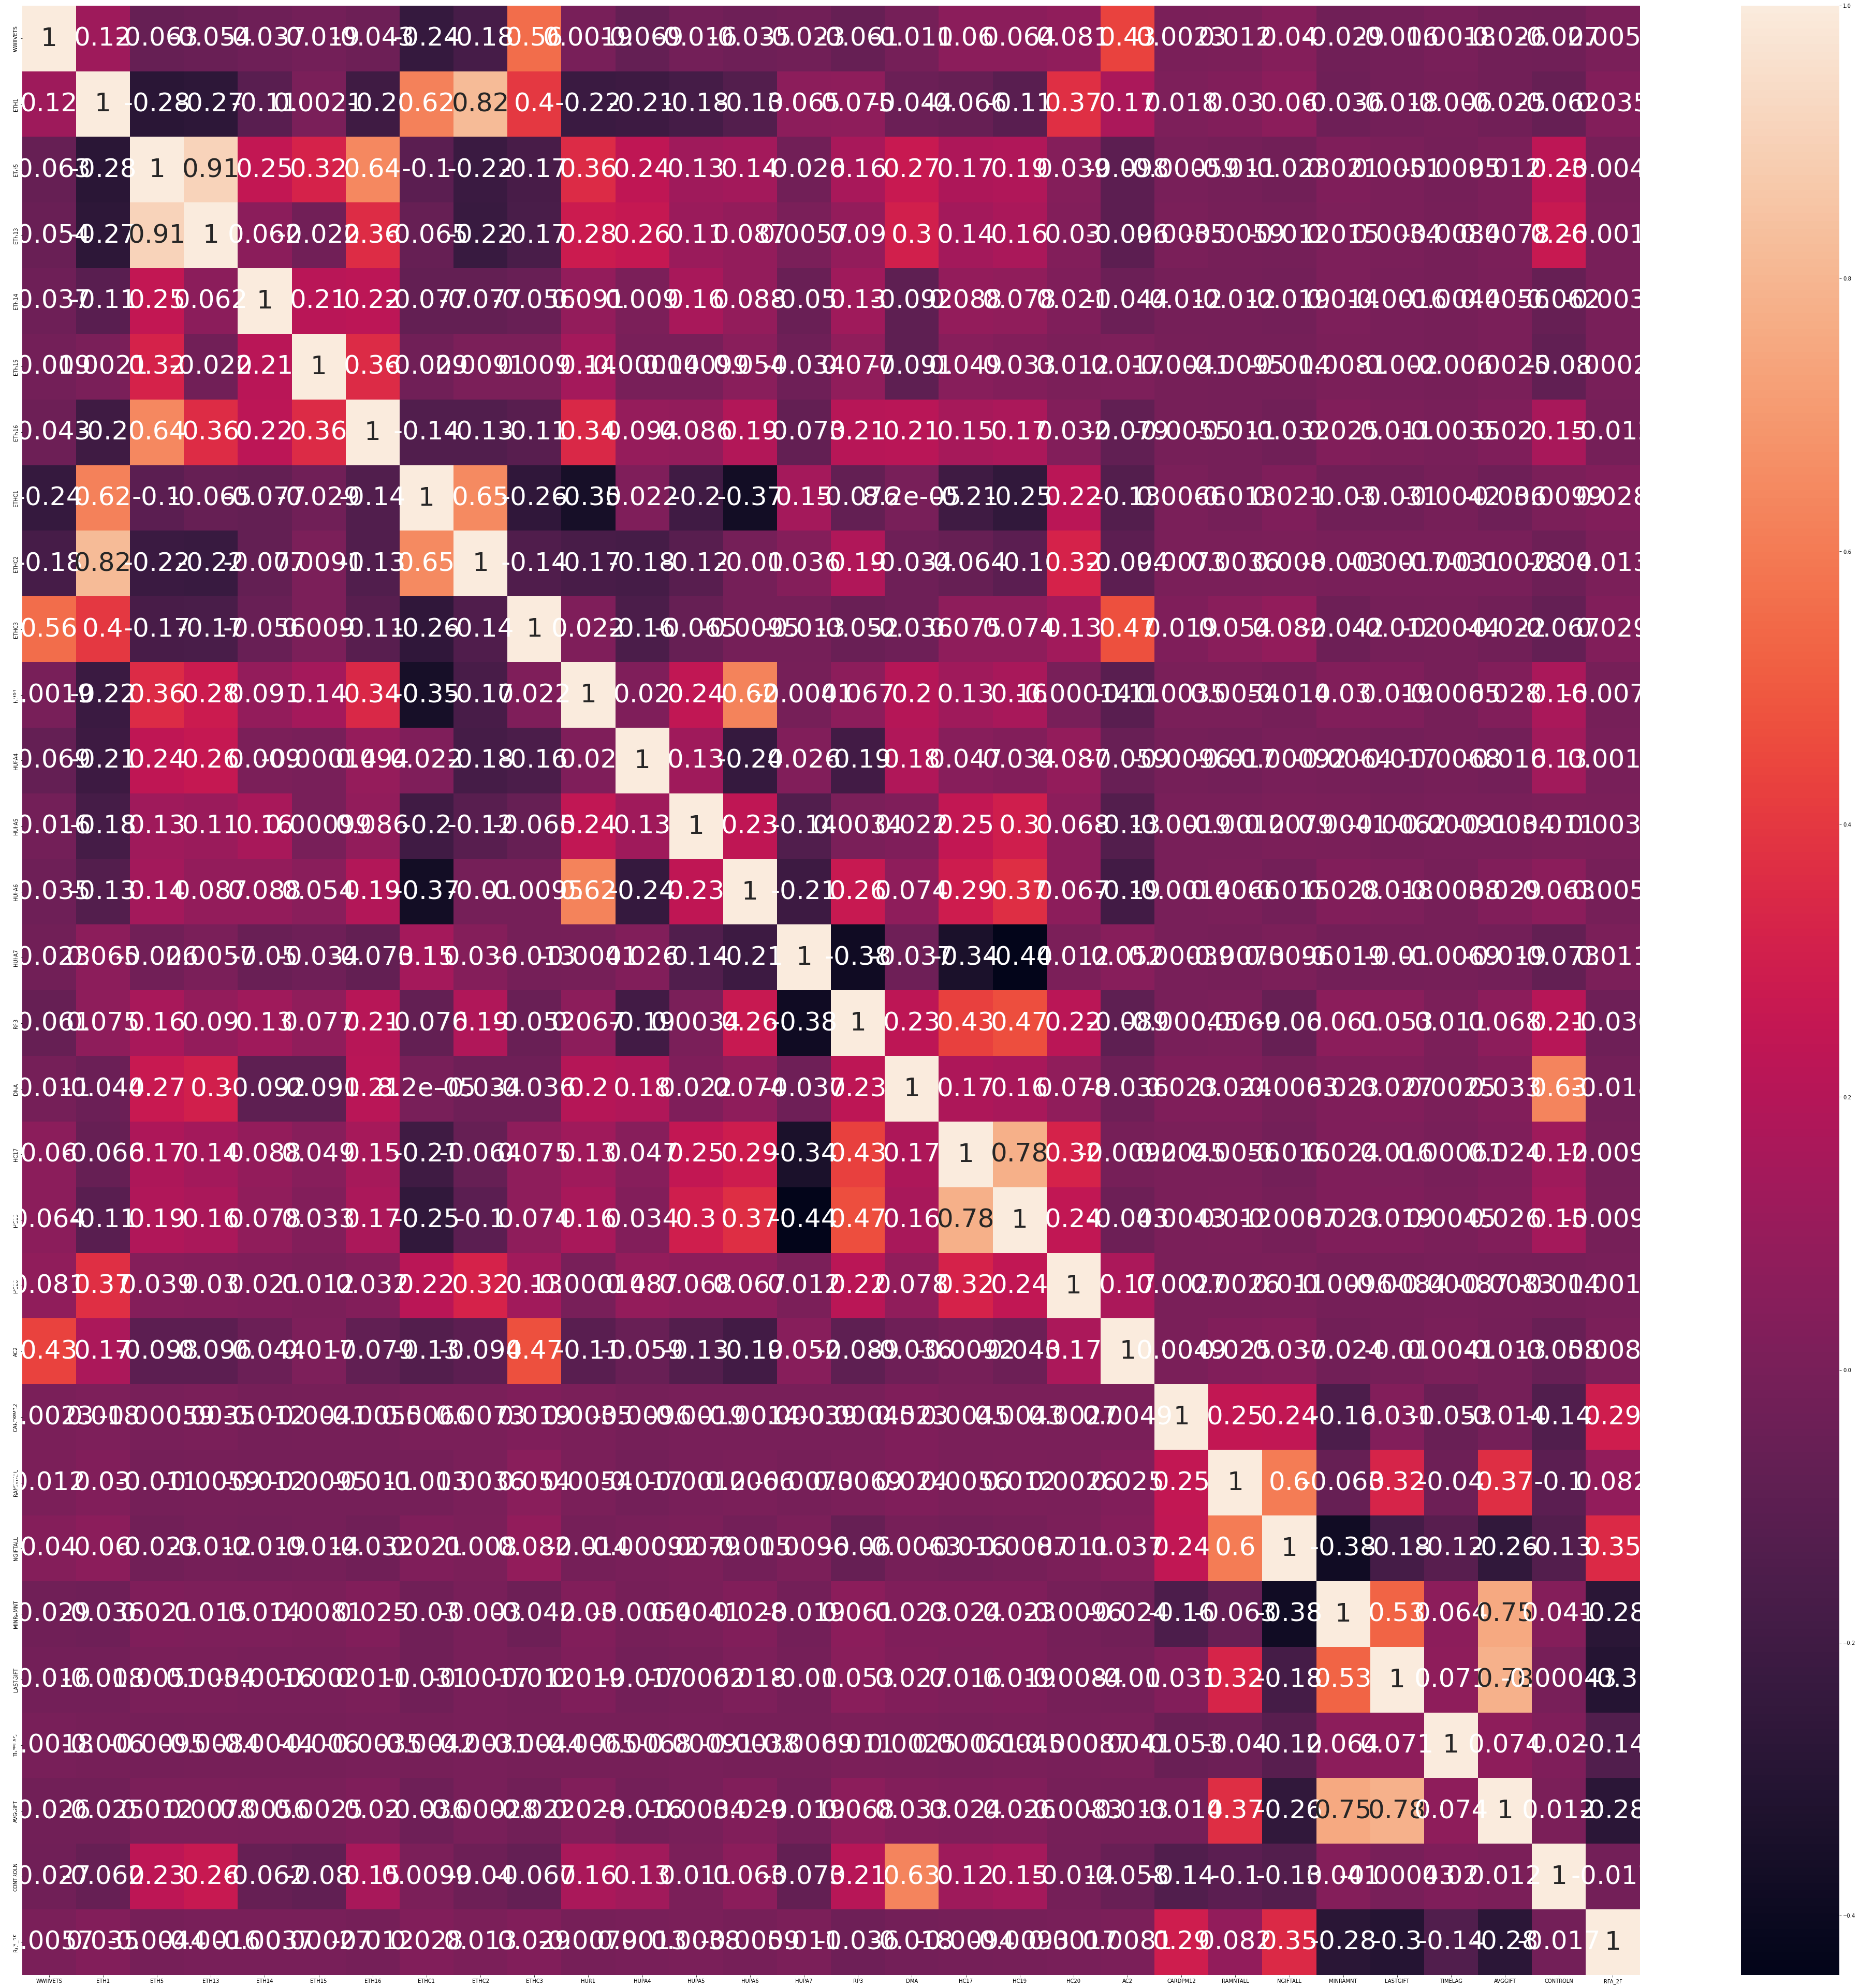

In [116]:
fig, ax = plt.subplots(figsize=(70, 70))
sns.heatmap(X.corr(),annot=True, annot_kws={'size': 50})

We drop ETH13 as is correlated to ETH5 (0.9 corr) and ETH5 is the most corr woth target 
HC19 for the same reasons colinearity
AVG_GIFT for the same reasons colinearity 

In [130]:
#drop multicolinearity
num = X.drop(["ETH13","HC19","AVGGIFT"], axis = 1)

In [131]:
num.isna().sum()
#no Null values 

WWIIVETS    0
ETH1        0
ETH5        0
ETH14       0
ETH15       0
ETH16       0
ETHC1       0
ETHC2       0
ETHC3       0
HUR1        0
HUPA4       0
HUPA5       0
HUPA6       0
HUPA7       0
RP3         0
DMA         0
HC17        0
HC20        0
AC2         0
CARDPM12    0
RAMNTALL    0
NGIFTALL    0
MINRAMNT    0
LASTGIFT    0
TIMELAG     0
CONTROLN    0
RFA_2F      0
dtype: int64

3.Build a DF with the 20 features and outcome 


In [132]:
# X Y split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(num, y, test_size=0.25)

In [133]:
# Train test split 
#normalize
from sklearn.preprocessing import MinMaxScaler

transformer = MinMaxScaler().fit(X_train)

num_train_minmax = transformer.transform(X_train)
num_test_minmax = transformer.transform(X_test)

In [134]:
#log reg model 
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state= 0)
classifier.fit(X_train,y_train)



/Users/chrislacarte/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [135]:
classifier.score(X_train, y_train)

0.948923266116072

In [136]:
classifier.score(X_test, y_test)

0.9485599295686077

4.Treat fior imbalance. Use the resampling strategies used in class for upsampling and downsampling to create a balance between the two classes.
Each time fit the model and see how the accuracy of the model is.


In [137]:
target.TARGET_B.value_counts()

0    90569
1     4843
Name: TARGET_B, dtype: int64

In [138]:
#there is an imbalancxe between people that donated and peole that didn't 

In [139]:
#we get the DF with the target
data = pd.concat([num, target.TARGET_B], axis=1)

In [151]:
#downsampling so we do not create artificial data 
from sklearn.utils import resample
#split (train) on 2 majority class 

category_0 = data[data['TARGET_B'] == 0]
category_1 = data[data['TARGET_B'] == 1]
print(len(category_0))
print(len(category_1))

#create a new DF category_0 by downsampling from 90569 to 4843
category_0_undersampled = resample(category_0, 
                                   replace=False, 
                                   n_samples = len(category_1))
print(len(category_0_undersampled))

90569
4843
4843


In [152]:
print(category_0_undersampled.shape)
print(category_1.shape)
# the sampkes are balanced now 

(4843, 28)
(4843, 28)


In [155]:
data_downsampled = pd.concat([category_0_undersampled, category_1], axis=0)

5.Apply classification (Log Regression and Decisssion Tree Regresion)


In [157]:
# NEW X Y split 
X = data_downsampled.drop(["TARGET_B"], axis=1)
y = data_downsampled["TARGET_B"]

In [158]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

num_train_minmax = transformer.transform(X_train)
num_test_minmax = transformer.transform(X_test)

classifier = LogisticRegression(random_state= 0)
classifier.fit(X_train,y_train)

print(classifier.score(X_train, y_train))
print(classifier.score(X_test, y_test))

0.5623623348017621
0.5503715937241949


In [159]:
#Undersampling does not give better results 

In [160]:
#Oversampling :
category_1_oversampled = resample(category_1, 
                                  replace=True, 
                                  n_samples = len(category_0))

print(category_0.shape)
print(category_1_oversampled.shape)



(90569, 28)
(90569, 28)


In [161]:
data_upsampled = pd.concat([category_0, category_1_oversampled], axis=0)

In [162]:
data_upsampled['TARGET_B'].value_counts()

0    90569
1    90569
Name: TARGET_B, dtype: int64

In [163]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

num_train_minmax = transformer.transform(X_train)
num_test_minmax = transformer.transform(X_test)

classifier = LogisticRegression(random_state= 0)
classifier.fit(X_train,y_train)

print(classifier.score(X_train, y_train))
print(classifier.score(X_test, y_test))

0.5747522026431718
0.5491329479768786


In [ ]:
6.Compare results 

None of the down or up sample gets better results.

In [170]:
!git add .

In [171]:
!git commit -m'finished'

[master ca8ab7a] finished
 4 files changed, 61 insertions(+), 286312 deletions(-)
 delete mode 100644 files_for_lab/categorical.csv
 delete mode 100644 files_for_lab/numerical.csv
 delete mode 100644 files_for_lab/target.csv


In [ ]:
!git push